<a href="https://colab.research.google.com/github/tranbaquang1708/GraduationThesis/blob/develop/IGR_Circle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import sys
import os
mp = os.path.abspath(os.path.join('/content/drive/My Drive/GraduationThesis/gitrepo/GraduationThesis/'))
sys.path.append(mp)

In [2]:
import torch
from modules import IGR, Visualization, Operation

In [3]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [4]:
dataset, normal_vectors = Operation.circle_dataset(device)

In [5]:
traineddata_path = mp + '/models/circle_noconstrain.traineddata'
model = IGR.load_model(traineddata_path, device)

In [6]:
loss_function = IGR.LossFunction()
model = IGR.train(dataset, normal_vectors, 30000, 100, device, loss_function, model=model)

Step 500:
tensor(1.0156, device='cuda:0', grad_fn=<AddBackward0>)
Step 1000:
tensor(1.0040, device='cuda:0', grad_fn=<AddBackward0>)
Step 1500:
tensor(1.0135, device='cuda:0', grad_fn=<AddBackward0>)
Step 2000:
tensor(1.0024, device='cuda:0', grad_fn=<AddBackward0>)
Step 2500:
tensor(1.0071, device='cuda:0', grad_fn=<AddBackward0>)
Step 3000:
tensor(1.0007, device='cuda:0', grad_fn=<AddBackward0>)
Step 3500:
tensor(1.0111, device='cuda:0', grad_fn=<AddBackward0>)
Step 4000:
tensor(1.0035, device='cuda:0', grad_fn=<AddBackward0>)
Step 4500:
tensor(1.0010, device='cuda:0', grad_fn=<AddBackward0>)
Step 5000:
tensor(1.0075, device='cuda:0', grad_fn=<AddBackward0>)
Step 5500:
tensor(1.0063, device='cuda:0', grad_fn=<AddBackward0>)
Step 6000:
tensor(1.0012, device='cuda:0', grad_fn=<AddBackward0>)
Step 6500:
tensor(1.0029, device='cuda:0', grad_fn=<AddBackward0>)
Step 7000:
tensor(1.0025, device='cuda:0', grad_fn=<AddBackward0>)
Step 7500:
tensor(1.0003, device='cuda:0', grad_fn=<AddBackward

In [7]:
IGR.save_model(traineddata_path, model)

In [8]:
xx, yy = Visualization.grid_from_torch(dataset[:,0], dataset[:,1], device)

In [9]:
z = Visualization.nn_sampling(model, xx, yy)

tensor([[0.0049, 0.0049, 0.0049,  ..., 0.0049, 0.0049, 0.0049],
        [0.0049, 0.0049, 0.0049,  ..., 0.0049, 0.0049, 0.0049],
        [0.0049, 0.0049, 0.0049,  ..., 0.0049, 0.0049, 0.0049],
        ...,
        [0.0049, 0.0049, 0.0049,  ..., 0.0049, 0.0049, 0.0049],
        [0.0049, 0.0049, 0.0049,  ..., 0.0049, 0.0049, 0.0049],
        [0.0049, 0.0049, 0.0049,  ..., 0.0049, 0.0049, 0.0049]],
       device='cuda:0', grad_fn=<ViewBackward>)


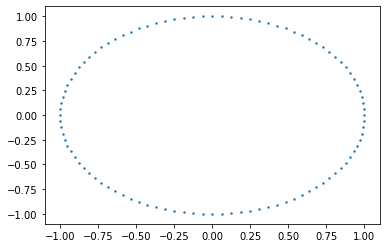

/content/drive/My Drive/GraduationThesis/gitrepo/GraduationThesis/modules/Visualization.py:25: UserWarning: No contour levels were found within the data range.
  h_object = plt.contour(xx,yy, z, levels=[0.0], colors='c')


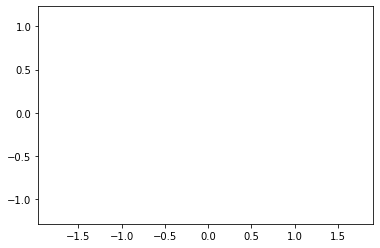

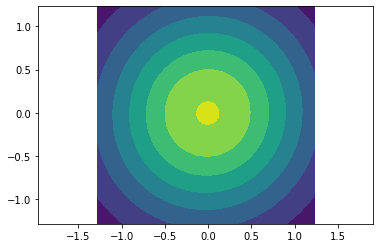

In [10]:
Visualization.visualize2(dataset.detach().cpu().numpy(), normal_vectors.detach().cpu().numpy(), xx.detach().cpu().numpy(), yy.detach().cpu().numpy(), z.detach().cpu().numpy(), scatter=True, vecfield=False, surface=True, offsurface=False, filled_contour=True)